In [1]:
def bollinger_bands(stock: "股票" = 3008, 
                    date: "日期" = (2012,1,1), 
                    ma_number: "平均日數" = 20, 
                    std_number: "正負多少標準差" = 2) -> "布林帶":
    """
    (1)價格由下向上穿越下軌線時，是買進訊號
    (2)價格由下向上穿越中間線時，股價可能加速向上，是加碼買進訊號
    (3)價格在中間線與上軌線之間波動時，為多頭市場，可作多
    (4)價格長時間在中間線與上軌線間後，由上往下跌破中間線，為賣出訊號
    (5)價格在中間線與下軌線之間向下波動時，為空頭市場，可作空
    """
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from datetime import datetime
    import pandas_datareader.data as web

    df = web.DataReader(str(stock)+".tw", "yahoo", datetime(date[0],date[1],date[2]))


    df['ma'] = pd.Series.rolling(df['Adj Close'], window=ma_number).mean()
    df['std'] = pd.Series.rolling(df['Adj Close'], window=ma_number).std()
    df['ubb'] = df['ma'] + std_number*df['std']
    df['mbb'] = df['ma']
    df['lbb'] = df['ma'] - std_number*df['std']

    fig = plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(df[['Adj Close']], color="#4B8BBE", label="close")
    plt.plot(df[['ubb']], color="coral")
    plt.plot(df[['mbb']], color="red", label=str(ma_number)+" ma")
    plt.plot(df[['lbb']], color="coral")
    plt.fill_between(df[['mbb']].index, np.squeeze(df[['lbb']]), np.squeeze(df[['ubb']]), alpha=0.2, label=str(std_number)+' stdev', color="#FFD43B")
    plt.title("Bollinger Bands", size=20)
    plt.xlabel('data', size=20) 
    plt.ylabel('stock prices', size=20) 
    plt.legend(prop={'size':15})
    plt.show()
    plt.savefig('Bollinger_Bands.png', dpi=400, bbox_inches='tight') 

In [2]:
bollinger_bands.__doc__

'\n    (1)價格由下向上穿越下軌線時，是買進訊號\n    (2)價格由下向上穿越中間線時，股價可能加速向上，是加碼買進訊號\n    (3)價格在中間線與上軌線之間波動時，為多頭市場，可作多\n    (4)價格長時間在中間線與上軌線間後，由上往下跌破中間線，為賣出訊號\n    (5)價格在中間線與下軌線之間向下波動時，為空頭市場，可作空\n    '

In [3]:
bollinger_bands.__annotations__

{'date': '日期',
 'ma_number': '平均日數',
 'return': '布林帶',
 'std_number': '正負多少標準差',
 'stock': '股票'}

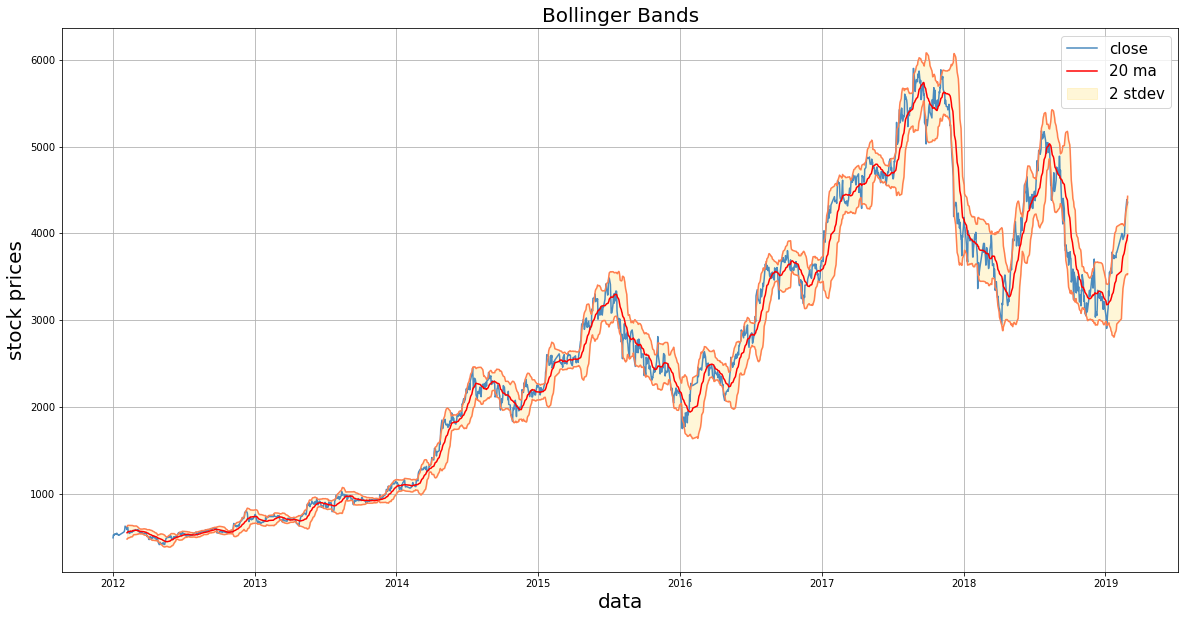

In [4]:
bollinger_bands()

<Figure size 432x288 with 0 Axes>

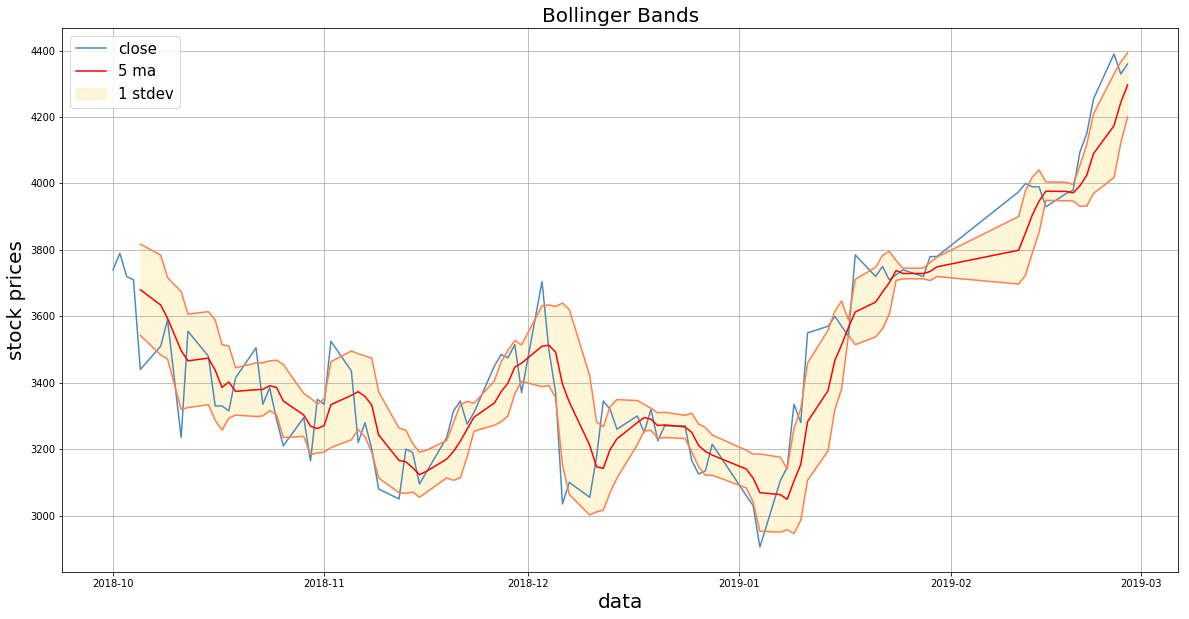

In [5]:
bollinger_bands(stock= 3008, date=(2018,10,1), ma_number=5, std_number= 1)

<Figure size 432x288 with 0 Axes>

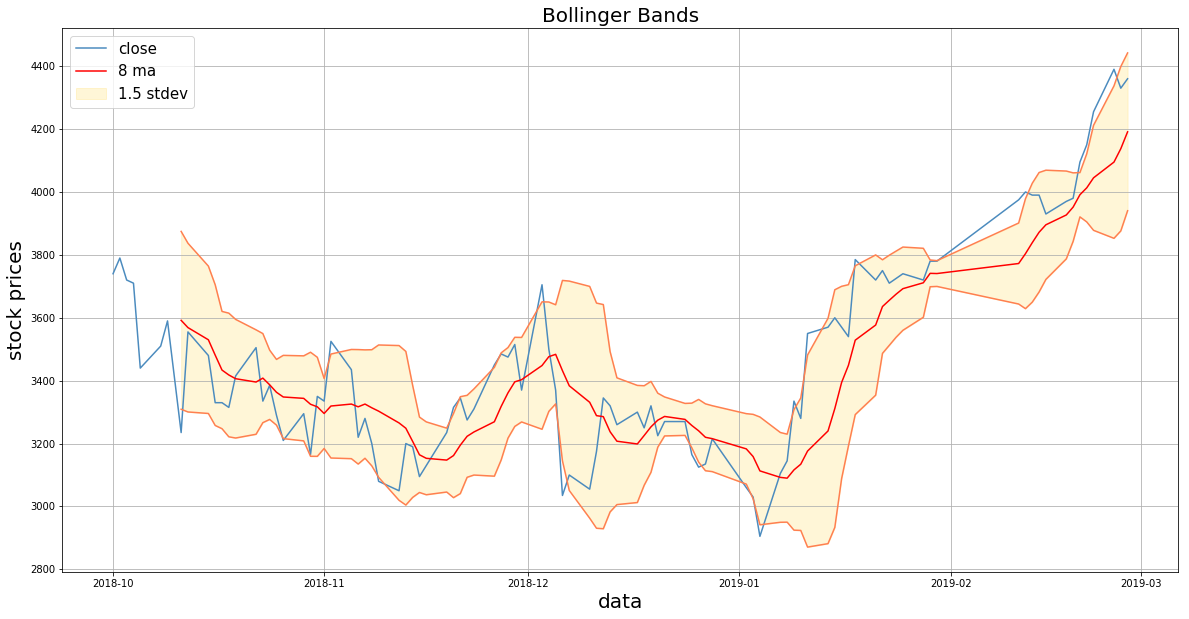

In [6]:
bollinger_bands(stock= 3008, date=(2018,10,1), ma_number=8, std_number= 1.5)